<a href="https://colab.research.google.com/github/aden-innis/storywall-week-5/blob/main/crash_modified_storywall_due_week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import set_config
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

set_config(transform_output="pandas")

In [ ]:
df_raw = pd.read_csv("ACCIDENT.csv", low_memory=False)
df_raw

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,...,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE
0,T20060000010,13/01/2006,12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,...,6.0,0.0,1.0,0.0,5.0,1.0,1.0,Cross intersection,3.0,60.0
1,T20060000018,13/01/2006,19:10:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,...,4.0,0.0,1.0,0.0,3.0,1.0,2.0,T intersection,3.0,70.0
2,T20060000022,14/01/2006,12:10:00,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,MEL,...,2.0,1.0,0.0,0.0,1.0,1.0,5.0,Not at intersection,2.0,100.0
3,T20060000023,14/01/2006,11:49:00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),MEL,...,2.0,1.0,0.0,0.0,1.0,1.0,2.0,T intersection,2.0,80.0
4,T20060000026,14/01/2006,10:45:00,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,MEL,...,3.0,0.0,3.0,0.0,0.0,1.0,5.0,Not at intersection,3.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21593,T20070028157,20/07/2007,19:20:00,1,Collision with vehicle,6,Friday,131,LEFT REAR,MEL,...,2.0,0.0,1.0,0.0,1.0,2.0,5.0,Not at intersection,3.0,999.0
21594,T20070028162,2/08/2007,20:00:00,4,Collision with a fixed object,5,Thursday,193,STRUCK RAILWAY CROSSING FURNITURE,VCS,...,1.0,0.0,1.0,0.0,0.0,1.0,5.0,Not at intersection,3.0,100.0
21595,T20070028164,18/07/2007,8:40:00,1,Collision with vehicle,4,Wednesday,130,REAR END(VEHICLES IN SAME LANE),MEL,...,3.0,0.0,1.0,0.0,2.0,2.0,5.0,Not at intersection,3.0,80.0
21596,T20070028165,3/08/2007,9:30:00,4,Collision with a fixed object,6,Friday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,MEL,...,1.0,0.0,1.0,0.0,0.0,1.0,5.0,Not at intersection,3.0,100.0


In [ ]:
df_raw.shape

(21598, 28)

In [ ]:
# Drop observations which have categorical variables which are very rare (< 10 obs in the dataset)
# This is a crude solution, though a more elegant solution would take too long.
df_simple = df_raw.copy()

sparse_categories = ["DCA_CODE", "LIGHT_CONDITION", "ROAD_GEOMETRY"]

for cat in sparse_categories:
    df_simple = df_simple[df_simple[cat].map(df_simple[cat].value_counts()) > 10]

df_simple

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,...,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE
0,T20060000010,13/01/2006,12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,...,6.0,0.0,1.0,0.0,5.0,1.0,1.0,Cross intersection,3.0,60.0
1,T20060000018,13/01/2006,19:10:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,...,4.0,0.0,1.0,0.0,3.0,1.0,2.0,T intersection,3.0,70.0
2,T20060000022,14/01/2006,12:10:00,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,MEL,...,2.0,1.0,0.0,0.0,1.0,1.0,5.0,Not at intersection,2.0,100.0
3,T20060000023,14/01/2006,11:49:00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),MEL,...,2.0,1.0,0.0,0.0,1.0,1.0,2.0,T intersection,2.0,80.0
4,T20060000026,14/01/2006,10:45:00,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,MEL,...,3.0,0.0,3.0,0.0,0.0,1.0,5.0,Not at intersection,3.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,T20070028152,2/08/2007,7:45:00,8,No collision and no object struck,5,Thursday,170,OFF CARRIAGEWAY TO LEFT,VCS,...,1.0,1.0,0.0,0.0,0.0,2.0,5.0,Not at intersection,3.0,100.0
21592,T20070028153,3/08/2007,9:50:00,1,Collision with vehicle,6,Friday,131,LEFT REAR,MEL,...,2.0,1.0,0.0,0.0,1.0,1.0,5.0,Not at intersection,2.0,60.0
21593,T20070028157,20/07/2007,19:20:00,1,Collision with vehicle,6,Friday,131,LEFT REAR,MEL,...,2.0,0.0,1.0,0.0,1.0,2.0,5.0,Not at intersection,3.0,999.0
21595,T20070028164,18/07/2007,8:40:00,1,Collision with vehicle,4,Wednesday,130,REAR END(VEHICLES IN SAME LANE),MEL,...,3.0,0.0,1.0,0.0,2.0,2.0,5.0,Not at intersection,3.0,80.0


In [ ]:
df_simple.shape

(21561, 28)

In [ ]:
drop = ["ACCIDENT_NO", 'ACCIDENTDATE', 'ACCIDENTTIME', "Accident Type Desc", "Day Week Description", "DCA Description",
        "DIRECTORY", "EDITION", "PAGE", "GRID_REFERENCE_X", "GRID_REFERENCE_Y",
        "Light Condition Desc", "NODE_ID", "Road Geometry Desc"]

df = df_simple.drop(drop, axis=1)

categorical_variables = ["ACCIDENT_TYPE", "DCA_CODE", "LIGHT_CONDITION", "ROAD_GEOMETRY"]
numerical_variables = [col for col in df.columns if col not in categorical_variables]

In [ ]:
print(categorical_variables)
print(numerical_variables)

['ACCIDENT_TYPE', 'DCA_CODE', 'LIGHT_CONDITION', 'ROAD_GEOMETRY']
['DAY_OF_WEEK', 'NO_OF_VEHICLES', 'NO_PERSONS', 'NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3', 'NO_PERSONS_KILLED', 'NO_PERSONS_NOT_INJ', 'POLICE_ATTEND', 'SEVERITY', 'SPEED_ZONE']


In [ ]:
# Print the number of unique categories
for cat in categorical_variables:
    print(f"{cat}: {df[cat].nunique()}")

ACCIDENT_TYPE: 9
DCA_CODE: 72
LIGHT_CONDITION: 7
ROAD_GEOMETRY: 6


In [ ]:
# Print the table-form of the histogram of the categorical variables
for cat in categorical_variables:
    print(df[cat].value_counts())

1    12817
4     3978
2     2158
8     1067
6      953
5      209
7      190
3      181
9        8
Name: ACCIDENT_TYPE, dtype: int64
130    2713
121    1934
171    1665
110    1524
173    1252
       ... 
192      17
154      15
165      14
159      13
194      12
Name: DCA_CODE, Length: 72, dtype: int64
1.0    14174
3.0     4019
2.0     1733
5.0     1280
9.0      152
6.0      136
4.0       67
Name: LIGHT_CONDITION, dtype: int64
5.0    11223
1.0     4927
2.0     4917
4.0      373
3.0       63
9.0       58
Name: ROAD_GEOMETRY, dtype: int64


In [ ]:
# Print out the unique values for each categorical variable and their descriptions
categorical_descriptions = ["Accident Type Desc", "DCA Description", "Light Condition Desc", "Road Geometry Desc"]

for cat, desc in zip(categorical_variables, categorical_descriptions):
    df_cat = df_raw[[cat, desc]].drop_duplicates().sort_values(by=[cat]).reset_index(drop=True)
    display(df_cat)
    print()


,ACCIDENT_TYPE,Accident Type Desc
0,1,Collision with vehicle
1,2,Struck Pedestrian
2,3,Struck animal
3,4,Collision with a fixed object
4,5,collision with some other object
5,6,Vehicle overturned (no collision)
6,7,Fall from or in moving vehicle
7,8,No collision and no object struck
8,9,Other accident


,DCA_CODE,DCA Description
0,100,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIG...
1,101,PED EMERGES FROM IN FRONT OF PARKED OR STATION...
2,102,FAR SIDE. PED HIT BY VEHICLE FROM THE LEFT ...
3,103,PED PLAYING/LYING/WORKING/STANDING ON CARRIAGE...
4,104,PED WALKING WITH TRAFFIC
...,...,...
74,192,STRUCK TRAIN
75,193,STRUCK RAILWAY CROSSING FURNITURE
76,194,PARKED CAR RUN AWAY
77,198,OTHER ACCIDENTS NOT CLASSIFIABLE ELSEWHERE ...


,LIGHT_CONDITION,Light Condition Desc
0,1.0,Day
1,2.0,Dusk/Dawn
2,3.0,Dark Street lights on
3,4.0,Dark Street lights off
4,5.0,Dark No street lights
5,6.0,Dark Street lights unknown
6,9.0,Unknown
7,NaN,NaN


,ROAD_GEOMETRY,Road Geometry Desc
0,1.0,Cross intersection
1,2.0,T intersection
2,3.0,Y intersection
3,4.0,Multiple intersection
4,5.0,Not at intersection
5,6.0,Dead end
6,9.0,Unknown
7,NaN,NaN


In [ ]:
target = (df["SEVERITY"] > 2)
features = df.drop("SEVERITY", axis=1)

In [ ]:
df.shape

(21561, 14)

In [ ]:
target.shape

(21561,)

In [ ]:
features.shape
features["ACCIDENT_TYPE"]
features["DCA_CODE"]
features["LIGHT_CONDITION"]
features["ROAD_GEOMETRY"]

0        1.0
1        2.0
2        5.0
3        2.0
4        5.0
        ... 
21591    5.0
21592    5.0
21593    5.0
21595    5.0
21596    5.0
Name: ROAD_GEOMETRY, Length: 21561, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, random_state=2023)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

num_accident, num_dca, num_light, num_road = X_train.nunique()[
    ["ACCIDENT_TYPE", "DCA_CODE", "LIGHT_CONDITION", "ROAD_GEOMETRY"]]

ct = make_column_transformer(
  (OrdinalEncoder(), ["ACCIDENT_TYPE", "DCA_CODE", "LIGHT_CONDITION", "ROAD_GEOMETRY"]),
  remainder=StandardScaler(),
   verbose_feature_names_out=False
)
X_train_ct = ct.fit_transform(X_train)
X_test_ct = ct.transform(X_test)

In [ ]:
#Split the brand and region data apart from the rest:
X_train_accident_type = X_train_ct["ACCIDENT_TYPE"];X_test_accident_type = X_test_ct["ACCIDENT_TYPE"]
X_train_dca_code = X_train_ct["DCA_CODE"]; X_test_dca_code = X_test_ct["DCA_CODE"]
X_train_light_condition = X_train_ct["LIGHT_CONDITION"]; X_test_light_condition = X_test_ct["LIGHT_CONDITION"]
X_train_road_geometry = X_train_ct["ROAD_GEOMETRY"]; X_test_road_geometry = X_test_ct["ROAD_GEOMETRY"]

X_train_rest = X_train_ct.drop(["ACCIDENT_TYPE", "DCA_CODE", "LIGHT_CONDITION", "ROAD_GEOMETRY"], axis=1)
X_test_rest = X_test_ct.drop(["ACCIDENT_TYPE", "DCA_CODE", "LIGHT_CONDITION", "ROAD_GEOMETRY"], axis=1)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

accident = Input(shape=(1,), name="accidentType")
dca = Input(shape=(1,), name="dcaCode")
light = Input(shape=(1,), name="lightCondition")
road = Input(shape=(1,), name="roadGeometry")
other_inputs = Input(shape=X_train_rest.shape[1:], name="otherInputs")

In [ ]:
#Create embeddings and join them with the other inputs.
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Embedding

random.seed(1337)
accident_ee = Embedding(input_dim=num_accident, output_dim=2,
    name="accidentTypeEE")(accident)
accident_ee = Reshape(target_shape=(2,))(accident_ee)

dca_ee = Embedding(input_dim=num_dca, output_dim=2,
    name="dcaCodeEE")(dca)
dca_ee = Reshape(target_shape=(2,))(dca_ee)

light_ee = Embedding(input_dim=num_light, output_dim=2,
    name="lightConditionEE")(light)
light_ee = Reshape(target_shape=(2,))(light_ee)

road_ee = Embedding(input_dim=num_road, output_dim=2,
    name="roadGeometryEE")(road)
road_ee = Reshape(target_shape=(2,))(road_ee)

In [ ]:
from tensorflow.keras.layers import Concatenate

#Network Architecture
x = Concatenate(name="combined")([accident_ee, dca_ee, light_ee, road_ee, other_inputs])
x = Dense(5, "relu", name="hidden")(x)
out = Dense(1, "sigmoid", name="out")(x)

model = Model([accident, dca, light, road, other_inputs], out)

In [ ]:
model.compile(optimizer="adam", loss="BinaryCrossentropy", metrics=["accuracy"])

In [ ]:
es = EarlyStopping(restore_best_weights=True, patience=50,
        monitor="val_accuracy")
hist = model.fit((X_train_accident_type, X_train_dca_code, X_train_light_condition, X_train_road_geometry, X_train_rest),
    y_train, epochs=100, verbose=0,
    callbacks=[es], validation_split=0.2)
np.min(hist.history["val_loss"])

0.41489338874816895

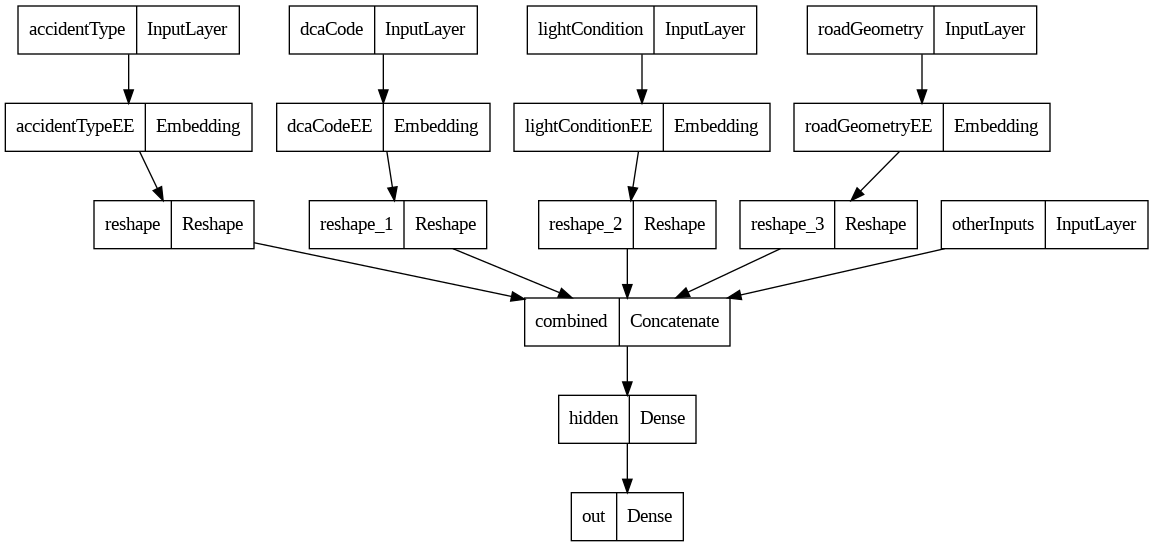

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
model.evaluate((X_test_accident_type, X_test_dca_code, X_test_light_condition, X_test_road_geometry, X_test_rest), y_test, verbose=False)

[0.4013570547103882, 0.8449267148971558]

In [ ]:
from sklearn.metrics import confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
y_pred = model.predict((X_test_accident_type, X_test_dca_code, X_test_light_condition, X_test_road_geometry, X_test_rest), verbose=False)

In [ ]:
y_pred_severe = y_pred > 0.5
confusion_matrix(y_test, y_pred_severe)

array([[2020,  261],
       [ 575, 2535]])

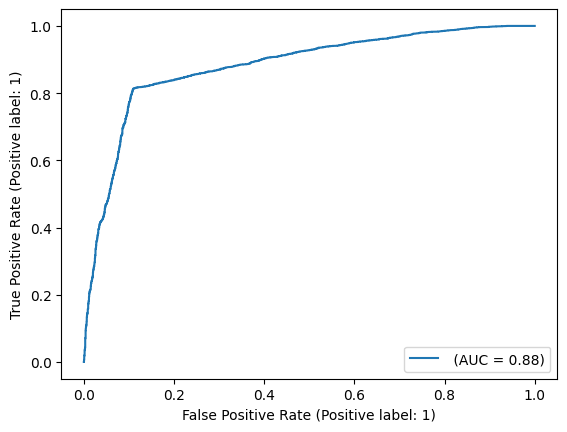

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_pred, name="");

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 accidentType (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 dcaCode (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 lightCondition (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 roadGeometry (InputLayer)      [(None, 1)]          0           []                               
                                                                                              

NameError: ignored

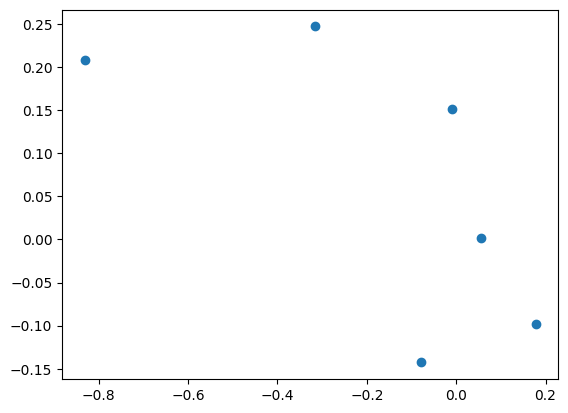

In [ ]:
points = model.layers[7].get_weights()[0]
plt.scatter(points[:,0], points[:,1])
for i in range(num_accident):
  plt.text(points[i,0]+0.01, points[i,1] , s=oe.categories_[0][i])

In [ ]:
model.layers

SyntaxError: ignored

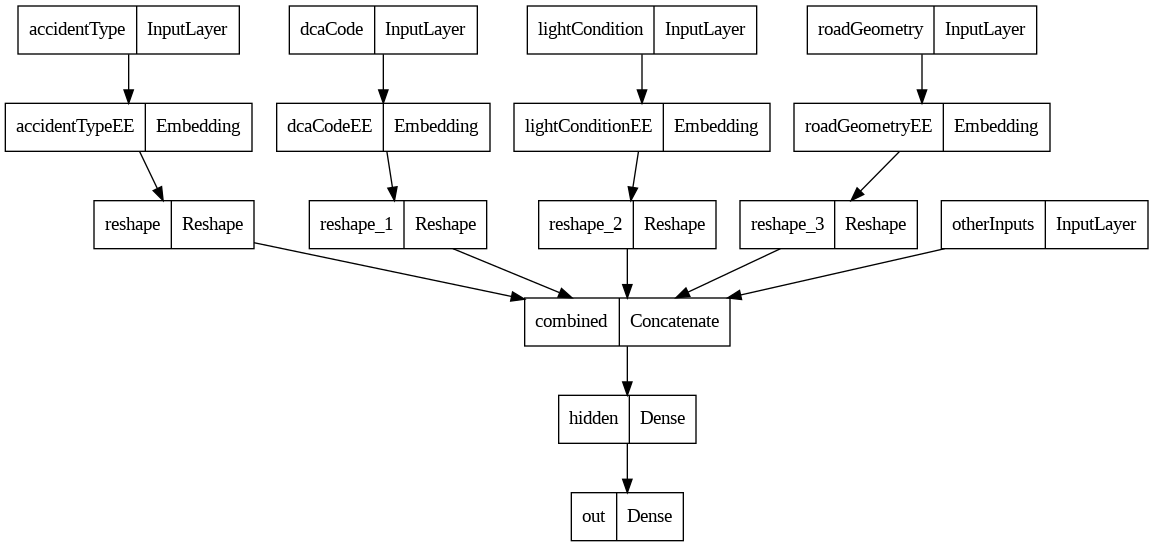

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
import random as rnd

In [ ]:
rnd.seed(42)
scores = []

X = pd.DataFrame(features)
y = pd.DataFrame(target)



In [ ]:
original_column = np.copy(X.iloc[:, 0].values)
print(original_column)
rnd.shuffle(X.iloc[:, 0].values)
X.iloc[:, 0] = original_column
print(X.iloc[:,0])

[1 1 1 ... 1 2 4]
0        1
1        1
2        1
3        1
4        1
        ..
21591    1
21592    1
21593    1
21595    2
21596    4
Name: ACCIDENT_TYPE, Length: 21561, dtype: int64


In [ ]:
for j in range(X.shape[1]): #this will be the shape of the ORIGINAL data
  original_column = np.copy(X.iloc[:, j].values)
  col_scores = []

  for r in range(1):
    rnd.shuffle(X.iloc[:, j].values)

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023)

    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)

    num_accident, num_dca, num_light, num_road = X_train.nunique()[["ACCIDENT_TYPE", "DCA_CODE", "LIGHT_CONDITION", "ROAD_GEOMETRY"]]

    ct = make_column_transformer(
      (OrdinalEncoder(), ["ACCIDENT_TYPE", "DCA_CODE", "LIGHT_CONDITION", "ROAD_GEOMETRY"]),
      remainder=StandardScaler(),
      verbose_feature_names_out=False
      )
    X_train_ct = ct.fit_transform(X_train)
    X_test_ct = ct.transform(X_test)

            #Split the brand and region data apart from the rest:
    X_train_accident_type = X_train_ct["ACCIDENT_TYPE"];X_test_accident_type = X_test_ct["ACCIDENT_TYPE"]
    X_train_dca_code = X_train_ct["DCA_CODE"]; X_test_dca_code = X_test_ct["DCA_CODE"]
    X_train_light_condition = X_train_ct["LIGHT_CONDITION"]; X_test_light_condition = X_test_ct["LIGHT_CONDITION"]
    X_train_road_geometry = X_train_ct["ROAD_GEOMETRY"]; X_test_road_geometry = X_test_ct["ROAD_GEOMETRY"]

    X_train_rest = X_train_ct.drop(["ACCIDENT_TYPE", "DCA_CODE", "LIGHT_CONDITION", "ROAD_GEOMETRY"], axis=1)
    X_test_rest = X_test_ct.drop(["ACCIDENT_TYPE", "DCA_CODE", "LIGHT_CONDITION", "ROAD_GEOMETRY"], axis=1)

    es = EarlyStopping(restore_best_weights=True, patience=25,
      monitor="val_accuracy")
    model.fit((X_train_accident_type, X_train_dca_code, X_train_light_condition, X_train_road_geometry, X_train_rest),
      y_train, epochs=50, verbose=0,
      callbacks=[es], validation_split=0.2)

    col_scores.append(model.evaluate((X_test_accident_type, X_test_dca_code, X_test_light_condition, X_test_road_geometry, X_test_rest), y_test, verbose=0))

    scores.append(np.mean(col_scores, axis=0))
    X.iloc[:, j] = original_column

  perm_scores = np.array(scores)

In [ ]:
scores = perm_scores[:,1]

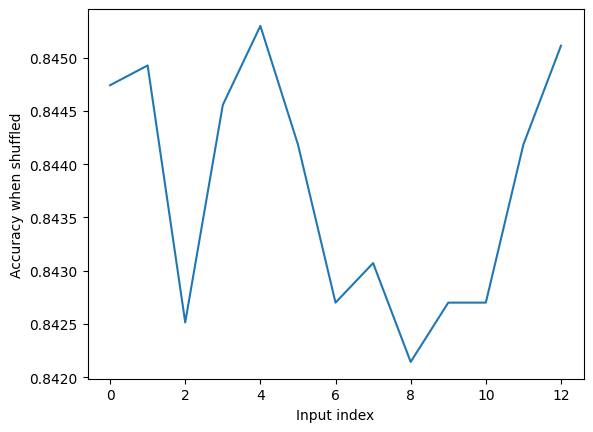

In [ ]:
plt.plot(scores);
plt.xlabel("Input index"); plt.ylabel("Accuracy when shuffled");

In [ ]:
#vocab = vect.get_feature_names_out()
input_cols = X.columns

best_input_inds = np.argsort(scores)
best_input_inds
best_inputs = [input_cols[idx] for idx in best_input_inds]

print(best_inputs)

['NO_PERSONS_KILLED', 'DCA_CODE', 'NO_PERSONS_INJ_2', 'NO_PERSONS_NOT_INJ', 'POLICE_ATTEND', 'NO_PERSONS_INJ_3', 'NO_PERSONS', 'ROAD_GEOMETRY', 'LIGHT_CONDITION', 'ACCIDENT_TYPE', 'DAY_OF_WEEK', 'SPEED_ZONE', 'NO_OF_VEHICLES']
